# organoid Notebook

In [1]:
from organoid import segmentation
from organoid import preprocessing
from organoid import reconstruction

import tifffile


pyklb library not found, klb files will not be generated


_reconstruct.py (297): "is not" with a literal. Did you mean "!="?
IO.py (31): KLB library is not installed


Example of usage of segmentation functions

In [2]:
path = rf'C:\Users\gros\Desktop\DATA\organoid_test'
data = tifffile.imread(rf'{path}\data.tif')
dapi=data[:,0,:,:]
stardist_model = rf'C:\Users\gros\Desktop\CODES\Alice_Segmentation\Stardist\models\lennedist_3d_grid222_rays64'

In [ ]:
output = segmentation.predict_stardist(data,model_path=stardist_model,input_voxelsize=[1,1,1],normalize_input=True)

Example of usage of reconstruction functions

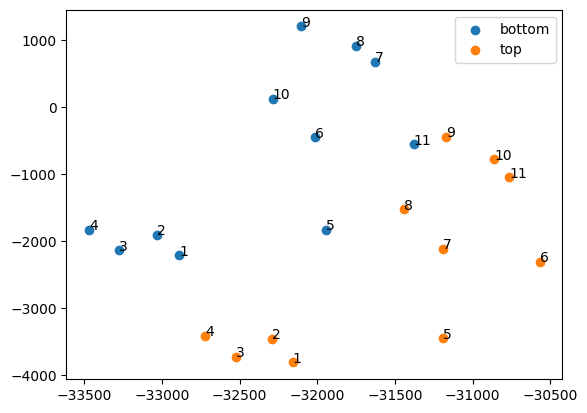

In [4]:
path = rf'Z:\EqpLenne2\Alice\Lecuit_biphoton\13072023_divrates_FGFA\72h'
reconstruction.plot_positions(path_bottom_positions=rf'{path}\multipoints_bottom.xml',
                              path_top_positions=rf'{path}\multipoints_top.xml')

In [3]:
path = rf'C:\Users\gros\Desktop\DATA\organoid_test\Registration'
path_to_bin = rf'C:\Users\gros\Anaconda3\envs\registration-env\Library\bin'
list_bottom=[1] #the length of this list corresponds to the number of samples.
list_top=[1]
channels=['dapi','ph3','bra','ecad']

In [8]:
#Creates folder structure
reconstruction.create_folders(path,list_bottom,list_top,channels)

In [9]:
#from now on, we consider only one sample. If you have multiple samples, you can loop over the parameter 'sample_id'
sample_id='1'
#register the reference channel first
reconstruction.register(path_data = rf'{path}\{sample_id}\raw',
                        path_transformation=rf'{path}\{sample_id}\trsf',
                        path_registered_data=rf'{path}\{sample_id}\registered',
                        path_to_bin=path_to_bin,
                        reference_image=f'{sample_id}_bot_dapi.tif',
                        floating_image=f'{sample_id}_top_dapi.tif',
                        input_voxel=[0.62,0.62,2],
                        output_voxel=[1,1,1],
                        compute_trsf=1,
                        init_trsfs=[["flip", "Y", "flip", "Z", "trans", "Z", -10]], #example of transformation if the sample has been flipped between the 2 views
                        test_init=0,
                        trsf_type='rigid',
                        depth=3,
                        save_json=True)

#and the others using the same transformation
for channel in channels[1:]:
    print(channel)
    reconstruction.register(path_data = rf'{path}\{sample_id}\raw',
                            path_transformation=rf'{path}\{sample_id}\trsf',
                            path_registered_data=rf'{path}\{sample_id}\registered',
                            path_to_bin=path_to_bin,
                            reference_image=f'{sample_id}_bot_{channel}.tif',
                            floating_image=f'{sample_id}_top_{channel}.tif',
                            input_voxel=[0.62,0.62,2],
                            output_voxel=[1,1,1],
                            compute_trsf=0, #we use the same transformation as the reference channel
                            )



Starting experiment
The registration will run with the following arguments:

 File format 
path_to_data             : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\raw
ref_im                   : 1_bot_dapi.tif
flo_ims                  : 1_top_dapi.tif
init_trsfs               : ['flip', 'Y', 'flip', 'Z', 'trans', 'Z', -10]
trsf_types               : rigid
ref_voxel                : 0.620000 x 0.620000 x 2.000000
flo_voxels               : 0.620000 x 0.620000 x 2.000000
out_voxel                : 1.000000 x 1.000000 x 1.000000
out_pattern              : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\registered

{'XResolution': 0.62, 'YResolution': 0.62, 'spacing': 2}
ph3

Starting experiment
The registration will run with the following arguments:

 File format 
path_to_data             : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\raw
ref_im                   : 1_bot_ph3.tif
flo_ims                  : 1_top_ph3.tif
init_trsfs               : ['flip', 'Y',

spatial_registration.py (169): Testing initial transformations cannot be done when `compute_trsf` is False/0. It will not be done then


bra

Starting experiment
The registration will run with the following arguments:

 File format 
path_to_data             : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\raw
ref_im                   : 1_bot_bra.tif
flo_ims                  : 1_top_bra.tif
init_trsfs               : ['flip', 'Y', 'flip', 'Z', 'trans', 'Z', -10]
trsf_types               : rigid
ref_voxel                : 0.620000 x 0.620000 x 2.000000
flo_voxels               : 0.620000 x 0.620000 x 2.000000
out_voxel                : 1.000000 x 1.000000 x 1.000000
out_pattern              : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\registered

{'XResolution': 0.62, 'YResolution': 0.62, 'spacing': 2}
ecad

Starting experiment
The registration will run with the following arguments:

 File format 
path_to_data             : C:\Users\gros\Desktop\DATA\organoid_test\Registration\1\raw
ref_im                   : 1_bot_ecad.tif
flo_ims                  : 1_top_ecad.tif
init_trsfs               : ['flip',

In [ ]:
#optional : if the automatic registration is not satisfying, you can give some initial transformations to the function
#once you have annotated landmarks in the reference and floating images, give these landmarks to the manual_registration fct
reference_landmarks = rf'{path}\reference_landmarks.tif'
floating_landmarks = rf'{path}\floating_landmarks.tif'
rot_z,rot_y,rot_x,trans_z,trans_y,trans_x = reconstruction.manual_registration_fct(reference_landmarks=reference_landmarks,floating_landmarks=floating_landmarks)

reconstruction.register(path_data = rf'{path}\{sample_id}\raw',
                        path_transformation=rf'{path}\{sample_id}\trsf',
                        path_registered_data=rf'{path}\{sample_id}\registered',
                        path_to_bin=path_to_bin,
                        reference_image=f'{sample_id}_bot_dapi.tif',
                        floating_image=f'{sample_id}_top_dapi.tif',
                        input_voxel=[0.62,0.62,2],
                        output_voxel=[1,1,1],
                        compute_trsf=1,
                        init_trsfs=[["rot","X",rot_z,"rot","Y",rot_y,"rot","Z",rot_x,"trans", "X",trans_x, "trans", "Y",trans_y,"trans", "Z",trans_z]] ,
                        test_init=0,
                        trsf_type='rigid',
                        depth=3,
                        save_json=path)



In [5]:
#Visualising the result
sample_id='1'
reconstruction.check_napari(path_registered_data=rf'{path}\{sample_id}\registered',
                            reference_image = f'{sample_id}_bot_dapi.tif',
                            floating_image = f'{sample_id}_top_dapi.tif',
                            scale=(1,1,1))

In [5]:
#Fuse the 2 registered sides into one array
sample_id='1'
reconstruction.fuse_sides(path_registered_data=rf'{path}\{sample_id}\registered',
                            reference_image_reg = f'{sample_id}_bot_dapi.tif',
                            floating_image_reg = f'{sample_id}_top_dapi.tif',
                            folder_output=rf'{path}\{sample_id}',
                            name_output='fused.tif',
                            fusion_width=10)

In [ ]:
#Fuse all the channels in one image
#the images should be named 'sampleid_channel_fused.tif', eg 1_'dapi_fused.tif'
reconstruction.write_hyperstacks(path, sample_id='1',channels=channels)